### Risk Management and Portfolio optimization

##### Algunos conceptos que vamos a ver en esta notebook son:

* Matriz correlación, covarianza.
* Introducción a la optimización de portafolios. Ratio de sharpe (media anualizada / volatilidad anualizada)
* Cálculo de medidas de riesgo

In [1]:
# Importamos las librerías que vamos a estar utilizando
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px
import statsmodels.api as sm

In [2]:
# visualizamos todas las columnas de los métodos en análisis 
pd.set_option('display.max_columns', None)

In [29]:
# Lo primero que hacemos es descargar la información de las acciones que vamos a analizar
# assets = ['AAPL','TSLA','NVDA','CVX', 'META', 'KO', 'PAM', 'WFC', 'MSFT', 'GGAL', 'WMT', 'PYPL', 'AMZN', 'GOLD']
assets = ['AAPL','NVDA','CVX', 'KO', 'WFC', 'MSFT', 'GGAL', 'WMT', 'AMZN', 'GOLD', 'HON', 'IRS']
data = yf.download(assets, end = '2024-02-13', auto_adjust=True)
data

/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/lautipintos/Documentos/finance_fundamentals/env/lib/python3.11/s

Price            Close                                                    \
Ticker            AAPL        AMZN         CVX   GGAL   GOLD         HON   
Date                                                                       
1962-01-02         NaN         NaN    0.339418    NaN    NaN    1.079926   
1962-01-03         NaN         NaN    0.338651    NaN    NaN    1.092089   
1962-01-04         NaN         NaN    0.335587    NaN    NaN    1.099385   
1962-01-05         NaN         NaN    0.327159    NaN    NaN    1.096953   
1962-01-08         NaN         NaN    0.325626    NaN    NaN    1.101818   
...                ...         ...         ...    ...    ...         ...   
2024-02-06  189.058762  169.149994  152.350006  20.66  15.03  193.639999   
2024-02-07  189.168625  170.529999  152.130005  19.32  14.93  194.100006   
2024-02-08  188.080017  169.839996  154.059998  18.15  14.82  193.460007   
2024-02-09  188.850006  174.449997  151.039993  19.00  14.67  194.839996   
2024-02-12  187.149994  172.339996  152.080002  19.25  14.73  197.350006   

Price                                                                       \
Ticker       IRS         KO        MSFT        NVDA        WFC         WMT   
Date                                                                         
1962-01-02   NaN   0.048145         NaN         NaN        NaN         NaN   
1962-01-03   NaN   0.047072         NaN         NaN        NaN         NaN   
1962-01-04   NaN   0.047430         NaN         NaN        NaN         NaN   
1962-01-05   NaN   0.046357         NaN         NaN        NaN         NaN   
1962-01-08   NaN   0.045880         NaN         NaN        NaN         NaN   
...          ...        ...         ...         ...        ...         ...   
2024-02-06  8.14  59.939999  404.741516  682.229980  48.290001  169.809998   
2024-02-07  7.84  59.990002  413.285706  700.989990  48.480000  169.380005   
2024-02-08  7.54  59.830002  413.345612  696.409973  48.349998  169.369995   
2024-02-09  8.04  59.560001  419.773712  721.330017  48.060001  169.279999   
2024-02-12  7.98  59.700001  414.493500  722.479980  48.919998  170.300003   

Price             High                                                        \
Ticker            AAPL        AMZN         CVX       GGAL   GOLD         HON   
Date                                                                           
1962-01-02         NaN         NaN    0.339418        NaN    NaN    1.082358   
1962-01-03         NaN         NaN    0.340184        NaN    NaN    1.092089   
1962-01-04         NaN         NaN    0.338651        NaN    NaN    1.109114   
1962-01-05         NaN         NaN    0.336353        NaN    NaN    1.109115   
1962-01-08         NaN         NaN    0.328691        NaN    NaN    1.109115   
...                ...         ...         ...        ...    ...         ...   
2024-02-06  189.068743  170.710007  153.539993  21.290001  15.23  194.070007   
2024-02-07  190.806534  170.880005  153.779999  19.930000  15.07  195.820007   
2024-02-08  189.298448  171.429993  154.300003  19.610001  14.97  194.020004   
2024-02-09  189.990005  175.000000  155.320007  19.049999  14.80  195.229996   
2024-02-12  188.669998  175.389999  152.610001  19.379999  14.80  197.630005   

Price                                                                       \
Ticker       IRS         KO        MSFT        NVDA        WFC         WMT   
Date                                                                         
1962-01-02   NaN   0.049456         NaN         NaN        NaN         NaN   
1962-01-03   NaN   0.047430         NaN         NaN        NaN         NaN   
1962-01-04   NaN   0.047787         NaN         NaN        NaN         NaN   
1962-01-05   NaN   0.048026         NaN         NaN        NaN         NaN   
1962-01-08   NaN   0.046000         NaN         NaN        NaN         NaN   
...          ...        ...         ...         ...        ...         ...   
2024-02-06  8.37  6

In [30]:
# Otra forma podría haber sido quedarnos exclusivamente con los precios de cierre ya que es nuestra variable de interes
data_final = data.stack(future_stack=True, level=0).reset_index(level=1)
data_final

Ticker,Price,AAPL,AMZN,CVX,GGAL,GOLD,HON,IRS,KO,MSFT,NVDA,WFC,WMT
Date,,,,,,,,,,,,,
1962-01-02,Close,NaN,NaN,3.394175e-01,NaN,NaN,1.079926e+00,NaN,4.814475e-02,NaN,NaN,NaN,NaN
1962-01-02,High,NaN,NaN,3.394175e-01,NaN,NaN,1.082358e+00,NaN,4.945554e-02,NaN,NaN,NaN,NaN
1962-01-02,Low,NaN,NaN,3.340543e-01,NaN,NaN,1.075062e+00,NaN,4.814475e-02,NaN,NaN,NaN,NaN
1962-01-02,Open,NaN,NaN,0.000000e+00,NaN,NaN,0.000000e+00,NaN,4.814475e-02,NaN,NaN,NaN,NaN
1962-01-02,Volume,NaN,NaN,1.058400e+05,NaN,NaN,4.074000e+04,NaN,8.064000e+05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-12,Close,1.871500e+02,1.723400e+02,1.520800e+02,19.250000,14.73,1.973500e+02,7.98,5.970000e+01,4.144935e+02,7.224800e+02,4.892000e+01,1.703000e+02
2024-02-12,High,1.886700e+02,1.753900e+02,1.526100e+02,19.379999,14.80,1.976300e+02,8.13,5.976000e+01,4.199634e+02,7.461100e+02,4.929000e+01,1.703600e+02
2024-02-12,Low,1.867900e+02,1.715400e+02,1.513900e+02,18.959999,14.54,1.937700e+02,7.92,5.896000e+01,4.139844e+02,7.125000e+02,4.788000e+01,1.690500e+02


In [31]:
# Ahora solamente filtramos los precios de cierre. Acá podemos decidir si nos queremos resetear el indice o no
data_final = data_final.loc[data_final['Price'] == 'Close', :].drop(columns = ['Price'])
data_final

Ticker,AAPL,AMZN,CVX,GGAL,GOLD,HON,IRS,KO,MSFT,NVDA,WFC,WMT
Date,,,,,,,,,,,,
1962-01-02,NaN,NaN,0.339418,NaN,NaN,1.079926,NaN,0.048145,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,0.338651,NaN,NaN,1.092089,NaN,0.047072,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,0.335587,NaN,NaN,1.099385,NaN,0.047430,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,0.327159,NaN,NaN,1.096953,NaN,0.046357,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,0.325626,NaN,NaN,1.101818,NaN,0.045880,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,189.058762,169.149994,152.350006,20.66,15.03,193.639999,8.14,59.939999,404.741516,682.229980,48.290001,169.809998
2024-02-07,189.168625,170.529999,152.130005,19.32,14.93,194.100006,7.84,59.990002,413.285706,700.989990,48.480000,169.380005
2024-02-08,188.080017,169.839996,154.059998,18.15,14.82,193.460007,7.54,59.830002,413.345612,696.409973,48.349998,169.369995


In [32]:
# Ahora vemos cual es el primer valor no nulo que aparece en cada una de las filas
data_final.apply(lambda x: x.first_valid_index())

Ticker
AAPL   1980-12-12
AMZN   1997-05-15
CVX    1962-01-02
GGAL   2000-07-25
GOLD   1985-02-13
HON    1962-01-02
IRS    1994-12-20
KO     1962-01-02
MSFT   1986-03-13
NVDA   1999-01-22
WFC    1972-06-01
WMT    1972-08-25
dtype: datetime64[ns]

In [36]:
fechita = data_final.apply(lambda x: x.first_valid_index()).max()

In [37]:
# Ahora que sabemos cual es el primero valor no nulo vamos a filtrar el dataset para quedarmos con todas las fechas desde ese valor
data_final = data_final[data_final.index >= fechita]
data_final

Ticker,AAPL,AMZN,CVX,GGAL,GOLD,HON,IRS,KO,MSFT,NVDA,WFC,WMT
Date,,,,,,,,,,,,
2000-07-25,0.756837,1.881250,16.268177,14.040114,11.653361,20.656689,14.943065,15.398674,21.349272,2.345919,10.855212,38.675838
2000-07-26,0.756837,1.803125,16.268177,14.040114,11.698009,19.643084,15.061660,15.284969,20.981846,2.171529,10.628053,38.389957
2000-07-27,0.786128,1.568750,17.030952,14.040114,11.608714,19.538221,14.943065,15.707302,21.465302,2.016248,10.903890,39.247604
2000-07-28,0.730381,1.500000,16.955332,13.939827,11.564062,18.454710,14.784936,16.292057,21.561991,2.064028,10.871441,38.349110
2000-07-31,0.768176,1.506250,16.619974,14.190547,11.385467,19.013941,14.745405,15.934706,21.600670,2.293362,10.774085,36.102905
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,189.058762,169.149994,152.350006,20.660000,15.030000,193.639999,8.140000,59.939999,404.741516,682.229980,48.290001,169.809998
2024-02-07,189.168625,170.529999,152.130005,19.320000,14.930000,194.100006,7.840000,59.990002,413.285706,700.989990,48.480000,169.380005
2024-02-08,188.080017,169.839996,154.059998,18.150000,14.820000,193.460007,7.540000,59.830002,413.345612,696.409973,48.349998,169.369995


In [38]:
# Ahora si realizamos un describe de la data
data_final.describe()

Ticker,AAPL,AMZN,CVX,GGAL,GOLD,HON,IRS,KO,MSFT,NVDA,WFC,WMT
count,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000,5925.000000
mean,36.060206,39.330338,64.495531,11.245580,19.605916,76.854926,9.836760,28.009986,74.567004,47.318348,28.180562,64.879035
std,52.089722,52.408856,38.378951,10.321386,8.629034,62.712846,5.829431,15.100413,93.524627,98.628430,12.399675,38.132937
min,0.198346,0.298500,14.110682,0.179981,5.114516,11.239053,2.156661,9.998874,11.283758,0.563403,5.547082,28.292973
25%,2.134640,2.261000,32.038666,4.978734,13.177954,24.582201,5.588687,14.092639,18.951342,2.790564,17.851112,35.778805
50%,13.523823,11.066000,63.129883,7.522129,16.785362,43.932556,8.464438,25.658911,23.607784,4.429462,22.894527,47.686401
75%,40.739601,74.266998,84.171417,12.971014,24.015869,124.762154,12.283004,37.585995,87.543304,41.667374,40.991764,80.040344
max,197.857529,186.570496,180.690491,61.358021,44.512230,223.091614,33.979523,62.817848,419.773712,722.479980,55.813000,170.300003


In [39]:
# También tomamos información de valores no nulos
data_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5925 entries, 2000-07-25 to 2024-02-12
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5925 non-null   float64
 1   AMZN    5925 non-null   float64
 2   CVX     5925 non-null   float64
 3   GGAL    5925 non-null   float64
 4   GOLD    5925 non-null   float64
 5   HON     5925 non-null   float64
 6   IRS     5925 non-null   float64
 7   KO      5925 non-null   float64
 8   MSFT    5925 non-null   float64
 9   NVDA    5925 non-null   float64
 10  WFC     5925 non-null   float64
 11  WMT     5925 non-null   float64
dtypes: float64(12)
memory usage: 601.8 KB


In [40]:
# Visualizamos otra forma validar los nulos
print(data_final['AAPL'].isnull().sum())
print(data_final['AMZN'].isnull().sum())
print(data_final['CVX'].isnull().sum())
print(data_final['GGAL'].isnull().sum())
print(data_final['GOLD'].isnull().sum())
print(data_final['HON'].isnull().sum())
print(data_final['IRS'].isnull().sum())
print(data_final['KO'].isnull().sum())
print(data_final['MSFT'].isnull().sum())
print(data_final['NVDA'].isnull().sum())
print(data_final['WFC'].isnull().sum())
print(data_final['WMT'].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [41]:
# Lo primero que tenemos que verificar es que nuestra serie de datos este ordenada temporalmente
# en este caso ya lo sabemos pero en cualquier caso siempre podemos hacerlo ...
data_final = data_final.sort_values(by= 'Date', ascending=True)
data_final

Ticker,AAPL,AMZN,CVX,GGAL,GOLD,HON,IRS,KO,MSFT,NVDA,WFC,WMT
Date,,,,,,,,,,,,
2000-07-25,0.756837,1.881250,16.268177,14.040114,11.653361,20.656689,14.943065,15.398674,21.349272,2.345919,10.855212,38.675838
2000-07-26,0.756837,1.803125,16.268177,14.040114,11.698009,19.643084,15.061660,15.284969,20.981846,2.171529,10.628053,38.389957
2000-07-27,0.786128,1.568750,17.030952,14.040114,11.608714,19.538221,14.943065,15.707302,21.465302,2.016248,10.903890,39.247604
2000-07-28,0.730381,1.500000,16.955332,13.939827,11.564062,18.454710,14.784936,16.292057,21.561991,2.064028,10.871441,38.349110
2000-07-31,0.768176,1.506250,16.619974,14.190547,11.385467,19.013941,14.745405,15.934706,21.600670,2.293362,10.774085,36.102905
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,189.058762,169.149994,152.350006,20.660000,15.030000,193.639999,8.140000,59.939999,404.741516,682.229980,48.290001,169.809998
2024-02-07,189.168625,170.529999,152.130005,19.320000,14.930000,194.100006,7.840000,59.990002,413.285706,700.989990,48.480000,169.380005
2024-02-08,188.080017,169.839996,154.059998,18.150000,14.820000,193.460007,7.540000,59.830002,413.345612,696.409973,48.349998,169.369995


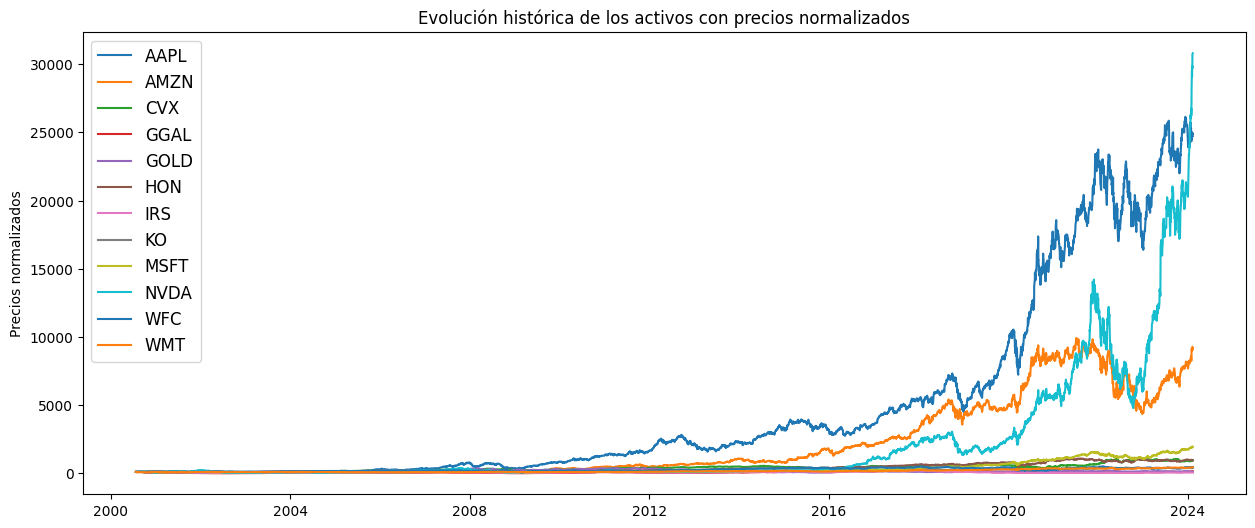

In [47]:
# Hacemos la representación gráfica de los precios
data_aux = data_final.divide(data_final.iloc[0] / 100)

plt.figure(figsize=(15, 6))
for i in range(data_aux.shape[1]):
    plt.plot(data_aux.iloc[:,i], label=data_aux.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Precios normalizados')
plt.title('Evolución histórica de los activos con precios normalizados')
plt.show()

In [42]:
# Podemos hacer lo mismo pero en lugar de retornos relativos, retornos logarítimos que tienen
# la particularidad de que se pueden sumar por la propiedad de los logarítmos
log_retornos = np.log(data_final / data_final.shift(1))
log_retornos = log_retornos.dropna()
log_retornos

Ticker,AAPL,AMZN,CVX,GGAL,GOLD,HON,IRS,KO,MSFT,NVDA,WFC,WMT
Date,,,,,,,,,,,,
2000-07-26,0.000000,-0.042415,0.000000,0.000000,0.003824,-0.050314,0.007905,-0.007411,-0.017360,-0.077246,-0.021148,-0.007419
2000-07-27,0.037971,-0.139242,0.045822,0.000000,-0.007663,-0.005353,-0.007905,0.027256,0.022780,-0.074193,0.025623,0.022095
2000-07-28,-0.073553,-0.044814,-0.004450,-0.007169,-0.003854,-0.057053,-0.010638,0.036552,0.004494,0.023421,-0.002980,-0.023159
2000-07-31,0.050453,0.004158,-0.019977,0.017826,-0.015565,0.029853,-0.002677,-0.022178,0.001792,0.105360,-0.008996,-0.060358
2000-08-01,-0.029965,0.004141,-0.001386,-0.010657,0.027081,0.003670,0.008011,0.027151,-0.016246,-0.019990,-0.007559,-0.013668
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,0.008595,-0.006834,0.000131,-0.005310,-0.009272,0.003259,0.009877,-0.001667,-0.000395,-0.016125,-0.008455,0.006795
2024-02-07,0.000581,0.008125,-0.001445,-0.067059,-0.006676,0.002373,-0.037551,0.000834,0.020891,0.027127,0.003927,-0.002535
2024-02-08,-0.005771,-0.004054,0.012607,-0.062470,-0.007395,-0.003303,-0.039017,-0.002671,0.000145,-0.006555,-0.002685,-0.000059


##### Avanzamos calculando algunso estadísticos univariados

Recordemos (nos va a servir para más adelante) que una vez calculada la media de una variable a aleatoria, la varianza no es más que la suma cuadrática de los desvíos respecto a esta media divido por el tamaño de nuestra muestra (n) menos 1 (1 grado de libertad, la media). Basicamente es una suma de distancias a la media.

##### Avanzamos calculando la matriz de correlaciones y de covarianzas

Recordando la definición de varianza podemos comprender facilmente la definición de covarianza. la covarianza es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias. Es el dato básico para determinar si existe una dependencia entre ambas variables y además es el dato necesario para estimar otros parámetros básicos, como el coeficiente de correlación lineal o la recta de regresión. 

$$
{\displaystyle {\begin{aligned}S_{xy}&={\frac {1}{n-1}}\sum _{i=1}^{n}{(x_{i}-{\overline {x}})(y_{i}-{\overline {y}})}\\&={\frac {1}{n-1}}[\sum _{i=1}^{n}{x_{i}y_{i}}-n{\bar {x}}{\bar {y}}]\end{aligned}}}
$$

Algo importante de la covarianza es que sensible al escala de nuestro conjunto de datos. De esta forma, es un dato dificil de interpretar y que solo nos habla del sentido de las relaciones. Es por esto que tenemos una métrica que nos es sensible a la escala de nuestro conjunto de datos y es la correlación.

Otro dato importante es que la covarianza de una variable consigo misma es la varianza y eso se puede visualizar en la fórmula.

Lo primero importante es que correlación no es causalidad. Lo que decimos es que hay cierta relación entre datos que presentan características similares. La correlación intenta medir la intencidad de esa relación. la correlación indica la fuerza y la dirección de una **relación lineal** y la proporcionalidad entre dos variables estadísticas. 

$$
{\displaystyle \rho _{X,Y}=\operatorname {corr} (X,Y)={\operatorname {cov} (X,Y) \over \sigma _{X}\sigma _{Y}}={\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})] \over \sigma _{X}\sigma _{Y}},\quad {\text{if}}\ \sigma _{X}\sigma _{Y}>0.}
$$

Basicamente lo que estamos haciendo es escalar la covarianza en terminos de las varianzas de cada activo. Es por que la correlación solo puede ir entre -1 y 1